##Boston House Prediction##

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.metrics import accuracy_score

# Data Understanding

In [ ]:
df = pd.read_csv('boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


crim - per capita crime rate by town

zn - proportion of residential land zoned for lots over 25,000 sq.ft.

indus - proportion of non-retail business acres per town.

chas - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

nox - nitric oxides concentration (parts per 10 million)

rm - average number of rooms per dwelling

age - proportion of owner-occupied units built prior to 1940

dis - weighted distances to five Boston employment centres

rad - index of accessibility to radial highways

tax - full-value property-tax rate per $10,000

ptratio - pupil-teacher ratio by town

black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

lstat - % lower status of the population

medv - Median value of owner-occupied homes in $1000's

In [ ]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

notes:
- no missing values
- no duplicate values

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


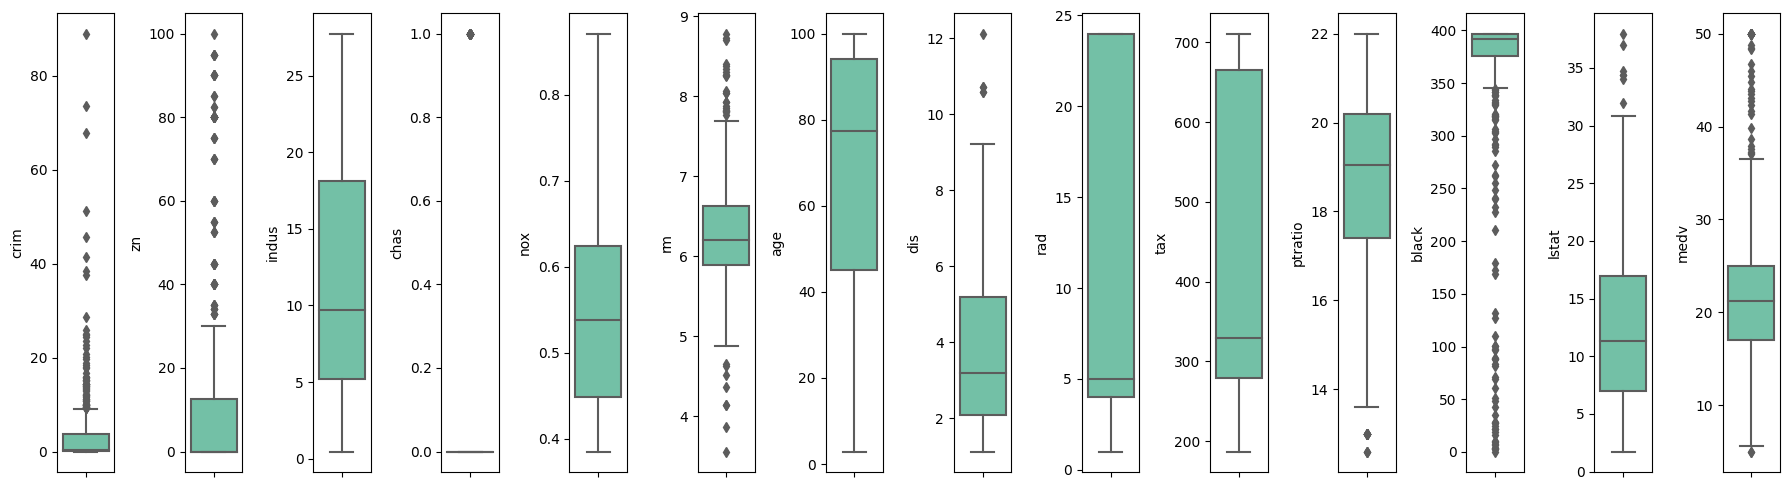

In [ ]:
plt.figure(figsize=(18,5))
# plotting
for i, column in enumerate(df.columns):
    plt.subplot(1, len(df.columns), i + 1)
    sns.boxplot(y=df[column], color='mediumaquamarine')
    plt.tight_layout()

plt.show()

In [ ]:
for k, x in df.items():
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  iqr = q3 - q1
  x_col = x[(x <= q1 - 1.5 * iqr) | (x >= q3 + 1.5 * iqr)]
  perc = np.shape(x_col)[0] * 100.0 / np.shape(df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column crim outliers = 13.04%
Column zn outliers = 13.44%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.93%
Column age outliers = 0.00%
Column dis outliers = 0.99%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.96%
Column black outliers = 15.22%
Column lstat outliers = 1.38%
Column medv outliers = 7.91%


note:
- columns without outlier : indus, nox, age, rad, tax

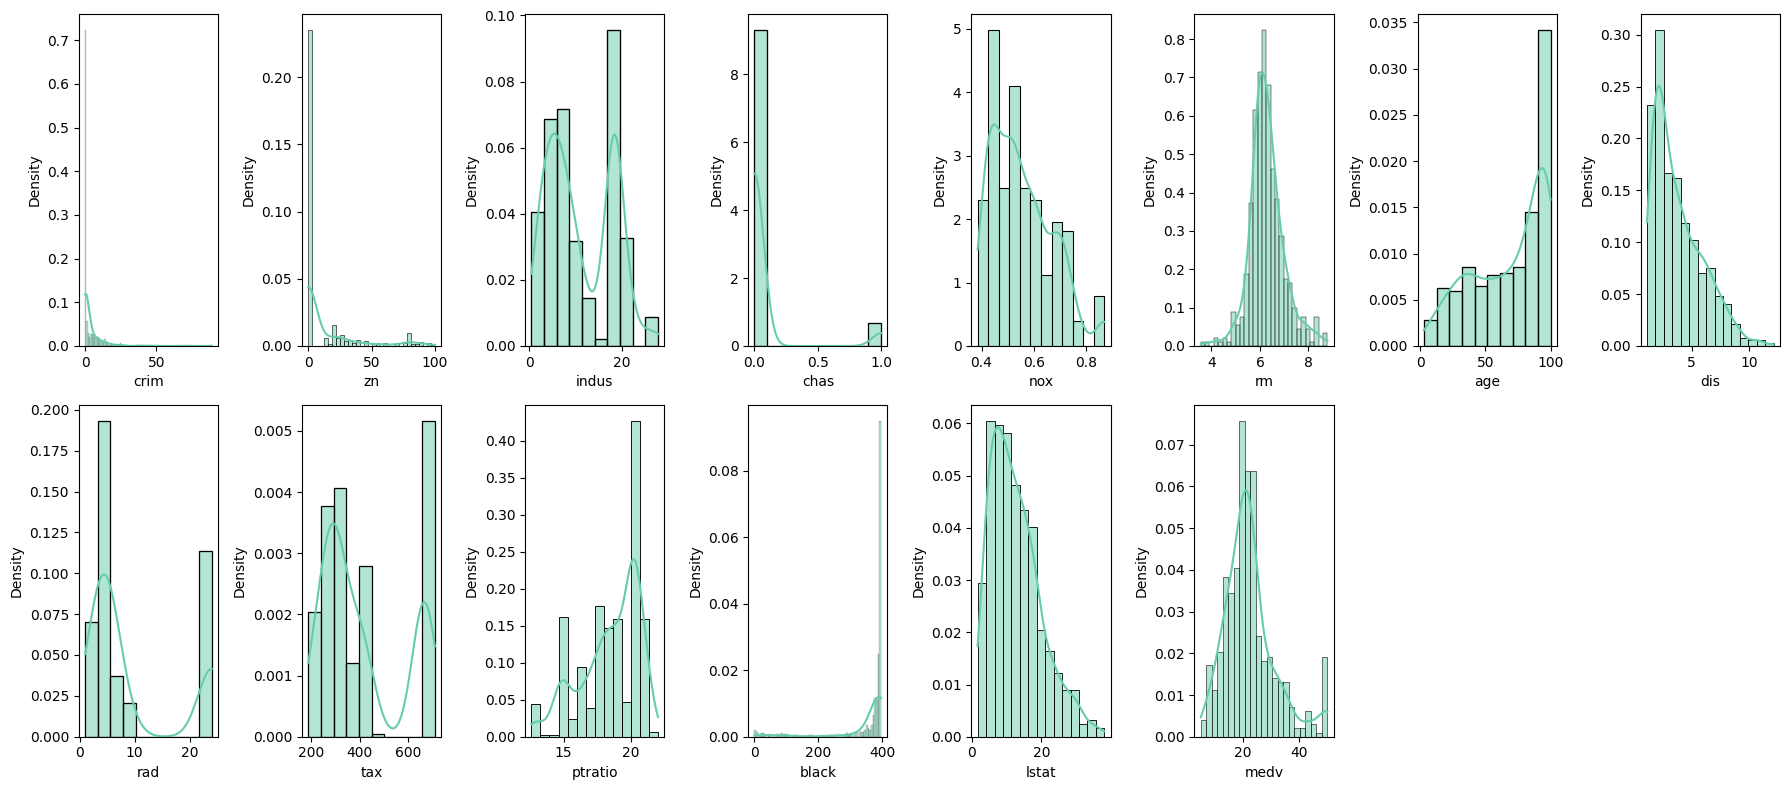

In [ ]:
# Inspect column distribution

plt.figure(figsize=(18,8))
# plotting
for i in range(0, len(df.columns)):
    plt.subplot(2, len(df.columns)//2 + 1, i+1)
    sns.histplot(x=df[df.columns[i]], color='mediumaquamarine', kde=True, stat="density")
    plt.xlabel(df.columns[i])
    plt.tight_layout()

In [ ]:
df['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

notes:
- normal distribution in : rm & medv
- chas is discrete (0 or 1)
- positively skewed : crim, zn, dis, lstat
- negatively skewed : black

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

# First splitting: pretrain and test
feature_admit_pretrain, feature_admit_test, target_admit_pretrain, target_admit_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_admit_train, feature_admit_validation, target_admit_train, target_admit_validation = train_test_split(feature_admit_pretrain, target_admit_pretrain, test_size=0.20, random_state=42)

# Correlation Plot
Draw correlation plot on training data and perform feature selection on
highly correlated features

In [ ]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_admit_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


note:
based on vif scores, we detect:
- moderate multicollinearity : nox, dis, rad, tax

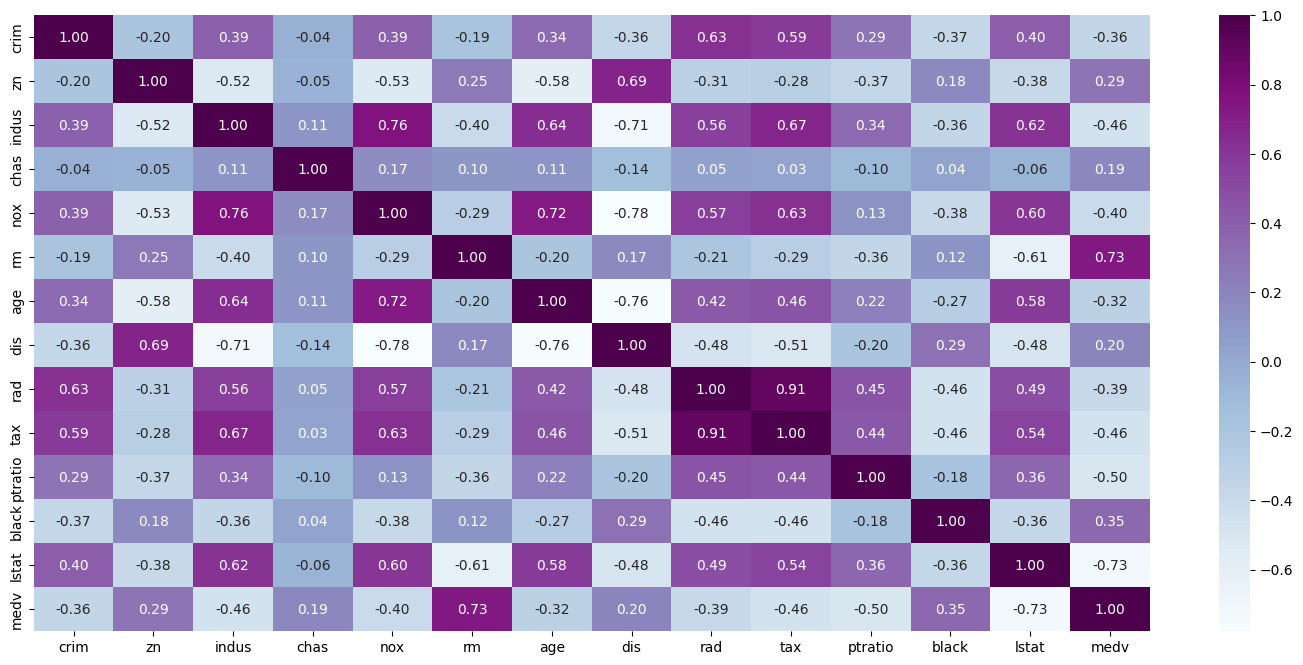

In [ ]:
# heatmap correlation
admit_train = pd.concat([feature_admit_train, target_admit_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True, fmt = ".2f", cmap = "BuPu")
plt.show()

note:
- tax and rad are highly correlated, drop one of them

In [ ]:
# drop rad column
feature_admit_train = feature_admit_train.drop(columns=['rad'])
feature_admit_validation = feature_admit_validation.drop(columns=['rad'])
feature_admit_test = feature_admit_test.drop(columns=['rad'])

In [ ]:
# recheck vif score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_admit_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.615076
2,zn,2.415036
3,indus,3.500250
4,chas,1.097962
5,nox,4.552308
6,rm,1.923266
7,age,3.119817
8,dis,4.390362
9,tax,3.191363
10,ptratio,1.804558


#Train Model - Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_admit_train = feature_admit_train.to_numpy()
y_admit_train = target_admit_train.to_numpy()
y_admit_train = y_admit_train.reshape(len(y_admit_train),)

In [ ]:
# define the model alpha=0.01
ridge_reg_pointzeroone = Ridge(alpha=0.01,
                           random_state=42)

ridge_reg_pointzeroone.fit(X_admit_train, y_admit_train)

data = feature_admit_train
model_pointzeroone = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model_pointzeroone.intercept_] + list(model_pointzeroone.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.704380
1,crim,-0.076888
2,zn,0.025720
3,indus,-0.006177
4,chas,3.293082
5,nox,-17.692904
6,rm,5.169093
7,age,-0.004816
8,dis,-1.506422
9,tax,0.000758


In [ ]:
# define the model alpha=0.1
ridge_reg_pointone = Ridge(alpha=0.1,
                           random_state=42)

ridge_reg_pointone.fit(X_admit_train, y_admit_train)

data = feature_admit_train
model_pointone = ridge_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model_pointone.intercept_] + list(model_pointone.coef_)
})

coef_df

,feature,coefficient
0,intercept,21.691058
1,crim,-0.076335
2,zn,0.026267
3,indus,-0.011401
4,chas,3.238613
5,nox,-16.227923
6,rm,5.174160
7,age,-0.005854
8,dis,-1.483599
9,tax,0.000488


In [ ]:
# define the model alpha=1
ridge_reg_one = Ridge(alpha=1,
                           random_state=42)

ridge_reg_one.fit(X_admit_train, y_admit_train)

data = feature_admit_train
model_one = ridge_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model_one.intercept_] + list(model_one.coef_)
})

coef_df

,feature,coefficient
0,intercept,16.790077
1,crim,-0.073607
2,zn,0.029092
3,indus,-0.037819
4,chas,2.912995
5,nox,-8.863465
6,rm,5.175816
7,age,-0.010808
8,dis,-1.369370
9,tax,-0.000856


In [ ]:
# define the model alpha=10
ridge_reg_ten = Ridge(alpha=10,
                           random_state=42)

ridge_reg_ten.fit(X_admit_train, y_admit_train)

data = feature_admit_train
model_ten = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model_ten.intercept_] + list(model_ten.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.064666
1,crim,-0.071408
2,zn,0.033030
3,indus,-0.067858
4,chas,1.955801
5,nox,-1.568248
6,rm,4.783168
7,age,-0.011523
8,dis,-1.260056
9,tax,-0.001976


In [ ]:
# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_admit_train, y_admit_train)
ridge_reg_pointone.fit(X_admit_train, y_admit_train)
ridge_reg_one.fit(X_admit_train, y_admit_train)
ridge_reg_ten.fit(X_admit_train, y_admit_train)

Ridge(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_admit_validation = feature_admit_validation.to_numpy()
y_admit_validation = target_admit_validation.to_numpy()
y_admit_validation = y_admit_validation.reshape(len(y_admit_validation),)

alphas = [0.01, 0.1, 1, 10]
models_ridge = [ridge_reg_pointzeroone,
                ridge_reg_pointone,
                ridge_reg_one,
                ridge_reg_ten]

rmse_list = []
for model, alpha in zip(models_ridge, alphas):
    y_predict_validation = model.predict(X_admit_validation)
    rmse = np.sqrt(mean_squared_error(y_admit_validation,y_predict_validation))
    rmse_list.append(rmse)
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

min_rmse = np.min(rmse_list)
print(f"The smallest RMSE is {min_rmse}")

RMSE of Ridge regression model with alpha = 0.01 is 4.960676932957843
RMSE of Ridge regression model with alpha = 0.1 is 4.94941253512279
RMSE of Ridge regression model with alpha = 1 is 4.912351371579992
RMSE of Ridge regression model with alpha = 10 is 4.871717983886228
The smallest RMSE is 4.871717983886228


note:
The best ridge regression model : with alpha 10

In [ ]:
# define the model with alpha 10
ridge_reg_ten = Ridge(alpha=10,
                  random_state=42)

ridge_reg_ten.fit(X_admit_train, y_admit_train)

# retrieve the coefficients
data = feature_admit_train
model = ridge_reg_ten

ridge_best = ridge_reg_ten
coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.064666
1,crim,-0.071408
2,zn,0.033030
3,indus,-0.067858
4,chas,1.955801
5,nox,-1.568248
6,rm,4.783168
7,age,-0.011523
8,dis,-1.260056
9,tax,-0.001976


In [ ]:
 # mdev = 15.064666 - 0.071408 crim + 0.033030 zn - 0.067858 indus + 1.955801 chas - 1.568248 nox + 4.783168 rm - 0.011523 age - 1.260056 dis - 0.001976 tax - 0.697550 ptratio + 0.012729 black - 0.523827 lstat

Interpretation, examples (ridge):
- for every 1 point increase in lstat (% lower status of the population), it will reduce 0.52387 in mdev (Median value of owner-occupied homes in $1000's) assuming other features remain constant

- for every 1 point increase in rm (average number of rooms per dwelling), it will increase 4.783168 in mdev (Median value of owner-occupied homes in $1000's) assuming other features remain constant


#Diagnostic Study - Ridge Regression

In [ ]:
from sklearn.metrics import r2_score

y_predict_train_ridge = ridge_best.predict(X_admit_train)

print('R-squared for training data is {}'.format(r2_score(y_admit_train, y_predict_train_ridge)))

R-squared for training data is 0.7485875263669821


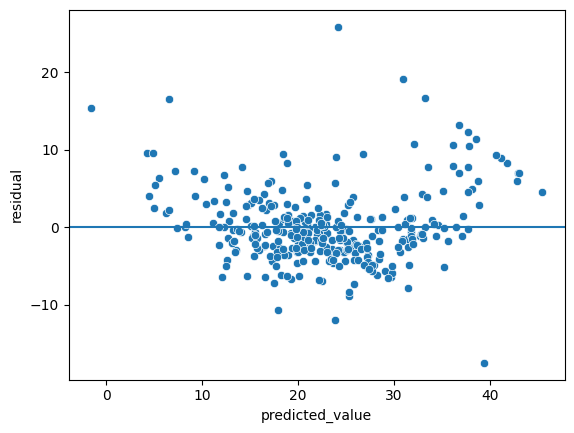

In [ ]:
# calculate residuals
residual_ridge = y_admit_train - y_predict_train_ridge

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train_ridge,
    'residual': residual_ridge
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

notes:
- linear relationship : OK, titik-titik residual tersebar cukup merata di sekitar garis nol
- variance stable : NO (varians tidak konstan), plot residualnya menunjukkan pola mengerucut di beberapa posisi
- independent residual : NO, titik-titik residual tidak tersebar secara acak

# Model Evaluation - Ridge Regression

##Training Error - Ridge Regression

In [ ]:
# prepare prediction result on train data
y_predict_train_ridge = ridge_best.predict(X_admit_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_admit_train, y_predict_train_ridge))))
print('MAE for training data is {}'.format(mean_absolute_error(y_admit_train, y_predict_train_ridge)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_admit_train, y_predict_train_ridge)))

RMSE for training data is 4.77864036104011
MAE for training data is 3.3776762058865626
MAPE for training data is 0.168680736633595


notes from prediction result on train data:
- standar deviation of the residuals is 4.77864036104011
- on average, our prediction deviates the true mdev by 3.3776762058865626 (MAE)
- that MAE is equivalent to 16.8680736633595% or 16.87% deviation relative to the true mdev (Median value of owner-occupied homes in $1000's)

- The model is good, MAPE <= 30% (still acceptable)

##Testing Error - Ridge Regression

In [ ]:
# prepare prediction result on test data
X_admit_test = feature_admit_test.to_numpy()
y_predict_test_ridge = ridge_best.predict(X_admit_test)

# ground truth target
y_admit_test = target_admit_test.to_numpy()
y_admit_test = y_admit_test.reshape(len(y_admit_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_admit_test, y_predict_test_ridge))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_admit_test, y_predict_test_ridge)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_admit_test, y_predict_test_ridge)))

RMSE for testing data is 5.158908333657057
MAE for testing data is 3.244481645704498
MAPE for testing data is 0.17618402626767926


notes from prediction result on test data:
- standar deviation of the residuals is 5.158908333657057
- on average, our prediction deviates the true mdev by 3.244481645704498 (MAE)
- that MAE is equivalent to 17.618402626767926% or 17.62% deviation relative to the true mdev (Median value of owner-occupied homes in $1000's)

- the model is good, MAPE <= 30% (still acceptable)

##Conclusion
The Ridge model is acceptable. The test performance data is not significantly worse than the train performance data, neither underfit nor overfit.

#Train Model - LASSO

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_admit_train = feature_admit_train.to_numpy()
y_admit_train = target_admit_train.to_numpy()
y_admit_train = y_admit_train.reshape(len(y_admit_train),)

In [ ]:
# define the model alpha=0.01
lasso_reg_pointzeroone = Lasso(alpha=0.01,
                               random_state=42)

lasso_reg_pointzeroone.fit(X_admit_train, y_admit_train)

data = feature_admit_train
model_pointzeroone = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model_pointzeroone.intercept_] + list(model_pointzeroone.coef_)
})

coef_df

,feature,coefficient
0,intercept,20.551571
1,crim,-0.075551
2,zn,0.026867
3,indus,-0.016046
4,chas,3.054465
5,nox,-14.477552
6,rm,5.165489
7,age,-0.006640
8,dis,-1.450508
9,tax,0.000159


In [ ]:
# define the model alpha=0.1
lasso_reg_pointone = Lasso(alpha=0.1,
                           random_state=42)

lasso_reg_pointone.fit(X_admit_train, y_admit_train)

data = feature_admit_train
model_pointone = lasso_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model_pointone.intercept_] + list(model_pointone.coef_)
})

coef_df

,feature,coefficient
0,intercept,11.590531
1,crim,-0.069246
2,zn,0.031882
3,indus,-0.053586
4,chas,1.297664
5,nox,-0.000000
6,rm,5.033031
7,age,-0.012249
8,dis,-1.173145
9,tax,-0.002510


In [ ]:
# define the model alpha=1
lasso_reg_one = Lasso(alpha=1,
                           random_state=42)

lasso_reg_one.fit(X_admit_train, y_admit_train)

data = feature_admit_train
model_one = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model_one.intercept_] + list(model_one.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.823435
1,crim,-0.041076
2,zn,0.025273
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.504122
7,age,0.022055
8,dis,-0.599362
9,tax,-0.002994


In [ ]:
# define the model alpha=10
lasso_reg_ten = Lasso(alpha=10,
                           random_state=42)

lasso_reg_ten.fit(X_admit_train, y_admit_train)

data = feature_admit_train
model_ten = lasso_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model_ten.intercept_] + list(model_ten.coef_)
})

coef_df

,feature,coefficient
0,intercept,29.865101
1,crim,-0.000000
2,zn,0.008746
3,indus,-0.000000
4,chas,0.000000
5,nox,0.000000
6,rm,0.000000
7,age,0.010902
8,dis,-0.000000
9,tax,-0.009347


In [ ]:
from sklearn.linear_model import Lasso

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_admit_train, y_admit_train)
lasso_reg_pointone.fit(X_admit_train, y_admit_train)
lasso_reg_one.fit(X_admit_train, y_admit_train)
lasso_reg_ten.fit(X_admit_train, y_admit_train)

Lasso(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_admit_validation = feature_admit_validation.to_numpy()
y_admit_validation = target_admit_validation.to_numpy()
y_admit_validation = y_admit_validation.reshape(len(y_admit_validation),)

alphas = [0.01, 0.1, 1, 10]
models_lasso = [lasso_reg_pointzeroone,
                lasso_reg_pointone,
                lasso_reg_one,
                lasso_reg_ten]

rmse_list = []
for model, alpha in zip(models_lasso, alphas):
    y_predict_validation = model.predict(X_admit_validation)
    rmse = np.sqrt(mean_squared_error(y_admit_validation,y_predict_validation))
    rmse_list.append(rmse)
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

min_rmse = np.min(rmse_list)
print(f"The smallest RMSE is {min_rmse}")

RMSE of Ridge regression model with alpha = 0.01 is 4.934105658639752
RMSE of Ridge regression model with alpha = 0.1 is 4.907145314259478
RMSE of Ridge regression model with alpha = 1 is 4.845855910636398
RMSE of Ridge regression model with alpha = 10 is 5.426622694252769
The smallest RMSE is 4.845855910636398


note:
The best lasso regression model : with alpha 1

In [ ]:
# define the model with alpha 1
lasso_reg_one = Lasso(alpha=1,
                  random_state=42)

lasso_reg_one.fit(X_admit_train, y_admit_train)

# retrieve the coefficients
data = feature_admit_train
model = lasso_reg_one

lasso_best = lasso_reg_one
coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.823435
1,crim,-0.041076
2,zn,0.025273
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.504122
7,age,0.022055
8,dis,-0.599362
9,tax,-0.002994


In [ ]:
 # mdev = 25.823435 - 0.041076 crim + 0.025273 zn + 2.504122 rm + 0.022055 age - 0.599362 dis - 0.002994 tax - 0.666222 ptratio + 0.011400 black - 0.712433 lstat

###Interpretation, examples (lasso):
- for every 1 point increase in lstat (% lower status of the population), it will reduce 0.712433 in mdev (Median value of owner-occupied homes in $1000's) assuming other features remain constant

- for every 1 point increase in rm (average number of rooms per dwelling), it will increase 2.504122 in mdev (Median value of owner-occupied homes in $1000's) assuming other features remain constant

- for every 1 point increase in tax (full-value property-tax rate per 10,000), it will reduce 0.002994 in mdev (Median value of owner-occupied homes in $1000's) assuming other features remain constant

#Diagnostic Study - LASSO

In [ ]:
from sklearn.metrics import r2_score

y_predict_train_lasso = lasso_best.predict(X_admit_train)

print('R-squared for training data is {}'.format(r2_score(y_admit_train, y_predict_train_lasso)))

R-squared for training data is 0.7056815963218595


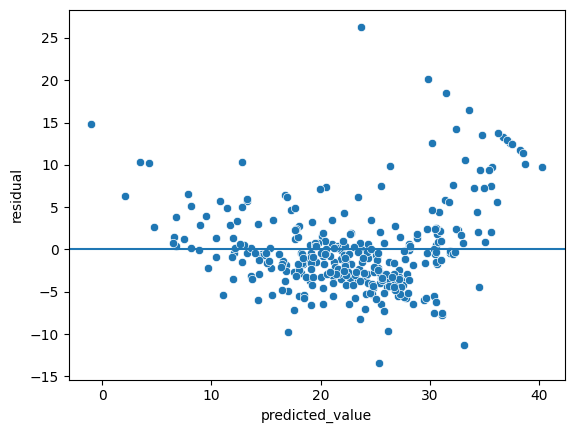

In [ ]:
# calculate residuals
residual_lasso = y_admit_train - y_predict_train_lasso

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train_lasso,
    'residual': residual_lasso
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

notes:
- linear relationship : OK, titik-titik residual tersebar cukup merata di sekitar garis nol
- variance stable : NO (varians tidak konstan), plot residualnya menunjukkan pola mengerucut di beberapa posisi
- independent residual : NO, titik-titik residual tidak tersebar secara acak

#Model Evaluation - LASSO

##Training Error - LASSO

In [ ]:
# prepare prediction result on train data
y_predict_train_lasso = lasso_best.predict(X_admit_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_admit_train, y_predict_train_lasso))))
print('MAE for training data is {}'.format(mean_absolute_error(y_admit_train, y_predict_train_lasso)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_admit_train, y_predict_train_lasso)))

RMSE for training data is 5.170346463296143
MAE for training data is 3.6858416211465084
MAPE for training data is 0.1749128202363825


notes:
- standar deviation of the residuals is 5.170346463296143
- on average, our prediction deviates the true mdev by 3.6858416211465084 (MAE)
- that MAE is equivalent to 17.49128202363825% or 17.49% deviation relative to the true mdev (Median value of owner-occupied homes in $1000's)

- the model is good, MAPE <= 30% (still acceptable)

##Testing Error - LASSO

In [ ]:
# prepare prediction result on test data
X_admit_test = feature_admit_test.to_numpy()
y_predict_test_lasso = lasso_best.predict(X_admit_test)

# ground truth target
y_admit_test = target_admit_test.to_numpy()
y_admit_test = y_admit_test.reshape(len(y_admit_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_admit_test, y_predict_test_lasso))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_admit_test, y_predict_test_lasso)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_admit_test, y_predict_test_lasso)))

RMSE for testing data is 5.125494212319777
MAE for testing data is 3.3980507105960682
MAPE for testing data is 0.17856606338732206


notes from prediction result on test data:
- standar deviation of the residuals is 5.125494212319777

- on average, our prediction deviates the true mdev by 3.3980507105960682 (MAE)

- that MAE is equivalent to 17.856606338732206% or 17.86% deviation relative to the true mdev (Median value of owner-occupied homes in $1000's)

- the model is good, MAPE <= 30% (still acceptable)

#Conclusion
The LASSO model is acceptable. The test performance data is not significantly worse than the train performance data, neither underfit nor overfit.

Overfitting = test performance data is significantly worse than train performance data